Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12944\269038618.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


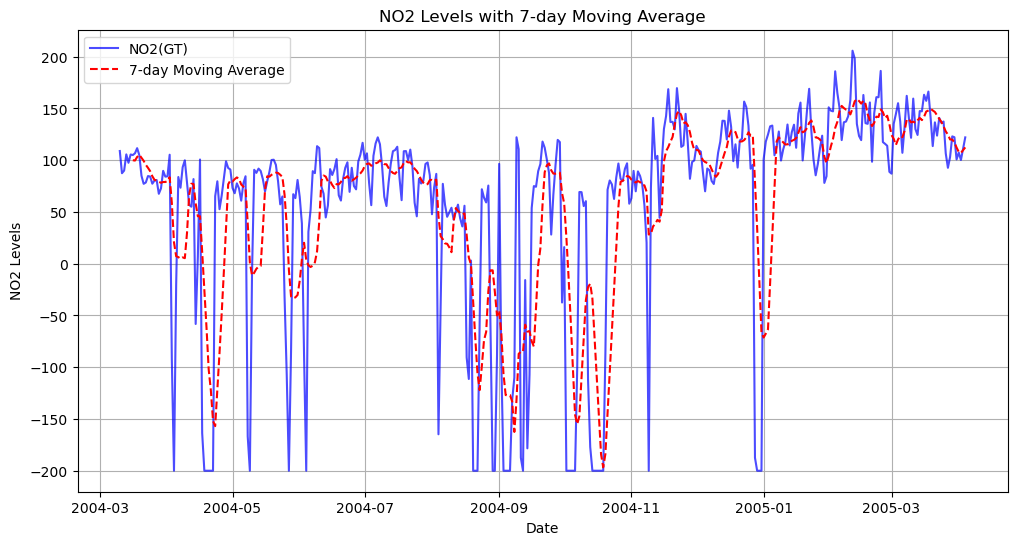

               CO(GT)  PT08.S1(CO)    NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  \
datetime                                                                   
2004-03-10   1.966667  1316.500000   86.500000   8.450000     912.333333   
2004-03-11  -6.187500  1244.166667  104.500000   7.979167     851.958333   
2004-03-12 -14.095833  1281.666667  141.500000  12.129167    1008.291667   
2004-03-13  -5.750000  1330.666667  139.250000  10.916667     992.833333   
2004-03-14  -5.966667  1361.125000  116.958333   9.637500     943.916667   

               NOx(GT)  PT08.S3(NOx)     NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
datetime                                                                      
2004-03-10  132.000000   1167.333333  108.833333   1545.500000  1096.000000   
2004-03-11  130.041667   1277.250000   87.375000   1522.833333   885.250000   
2004-03-12  142.583333   1101.875000   89.916667   1627.291667  1084.375000   
2004-03-13  168.416667    993.208333  105.583333   1595.791667  1245.916

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C://Users//Lenovo//Downloads//AirQuality.csv"
df = pd.read_csv(file_path, delimiter=";")

# Print the columns to inspect the data
print(df.columns)

# Fix time format and create a datetime column
df['Time'] = df['Time'].str.replace('.', ':', regex=False)
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

# Drop the original 'Date' and 'Time' columns and set the datetime as index
df.drop(['Date', 'Time'], axis=1, inplace=True)
df.set_index('datetime', inplace=True)

# Ensure that relevant columns are numeric, forcing errors to NaN
numeric_columns = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH', 'AH']

# Convert columns to string first, then replace commas with periods, and finally convert to numeric
for col in numeric_columns:
    df[col] = df[col].astype(str).str.replace(',', '.', regex=False)  # Convert to string and replace commas
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, errors become NaN

# Fill any remaining NaN values using forward fill
df.fillna(method='ffill', inplace=True)

# Resample the data to daily frequency and calculate the mean for each day
df_daily = df.resample('D').mean()

# Calculate the 7-day moving average for the NO2(GT) column
df_daily['NO2_SMA_7'] = df_daily['NO2(GT)'].rolling(window=7).mean()

# Plot the NO2 levels and the 7-day moving average
plt.figure(figsize=(12, 6))
plt.plot(df_daily.index, df_daily['NO2(GT)'], label='NO2(GT)', color='blue', alpha=0.7)
plt.plot(df_daily.index, df_daily['NO2_SMA_7'], label='7-day Moving Average', color='red', linestyle='--')
plt.title('NO2 Levels with 7-day Moving Average')
plt.xlabel('Date')
plt.ylabel('NO2 Levels')
plt.legend()
plt.grid(True)
plt.show()

# Save the cleaned data to a new CSV file
df_daily.to_csv(r"C://Users//Lenovo//Downloads//cleaned_air_quality_data.csv")

# Check the cleaned data
print(df_daily.head())
